In [22]:
import numpy as np
import matplotlib.pyplot as plt

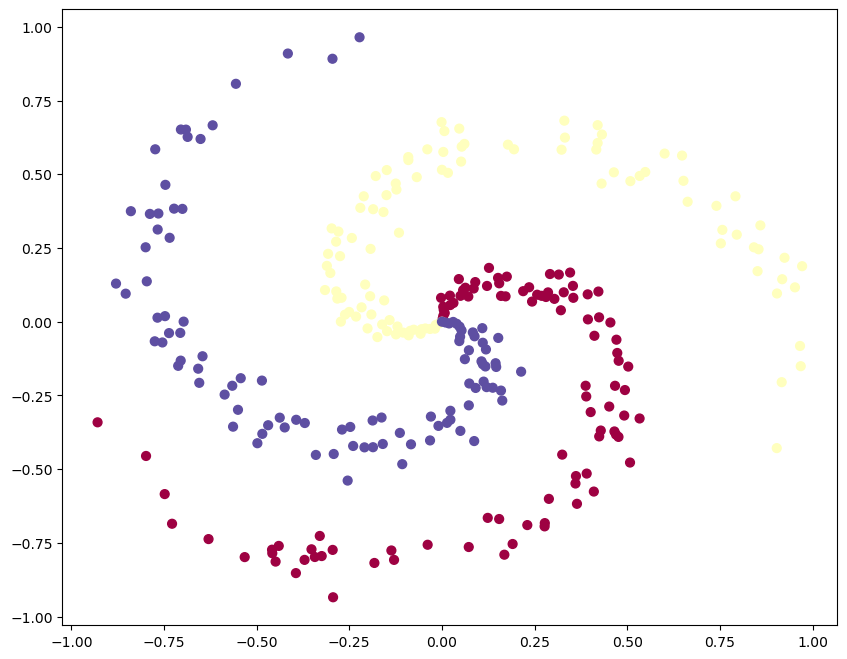

In [23]:
N = 100 # number of points per class
D = 2 # dimensionality
K = 3 # number of classes
X = np.zeros((N*K,D)) # data matrix (each row = single example)
y = np.zeros(N*K, dtype='uint8') # class labels
for j in range(K):
  ix = range(N*j,N*(j+1))
  r = np.linspace(0.0,1,N) # radius
  t = np.linspace(j*4,(j+1)*4,N) + np.random.randn(N)*0.2 # theta
  X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
  y[ix] = j
# lets visualize the data:
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.show()

In [24]:
# Train a Linear Classifier

# initialize parameters randomly
W = 0.01 * np.random.randn(D, K)
b = np.zeros((1, K))

# some hyperparameters
step_size = 1e-0
reg = 1e-3  # regularization strength

# gradient descent loop
num_examples = X.shape[0]
for i in range(200):
    # evaluate class scores, [N x K]
    scores = np.dot(X, W) + b
    # print(scores.shape, (X.shape, W.shape, b.shape))

    # compute the class probabilities
    exp_scores = np.exp(scores)
    probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)  # [N x K]

    # compute the loss: average cross-entropy loss and regularization
    correct_logprobs = -np.log(probs[range(num_examples), y])
    data_loss = np.sum(correct_logprobs) / num_examples
    reg_loss = 0.5 * reg * np.sum(W * W)
    loss = data_loss + reg_loss
    if i % 10 == 0:
        print(f"iteration {i}: loss {loss}")
    # compute the gradient on scores
    dscores = probs
    dscores[range(num_examples), y] -= 1
    dscores /= num_examples

    # backpropate the gradient to the parameters (W,b)
    dW = np.dot(X.T, dscores)
    db = np.sum(dscores, axis=0, keepdims=True)

    dW += reg * W  # regularization gradient

    # perform a parameter update
    W += -step_size * dW
    b += -step_size * db

iteration 0: loss 1.0963864227857145
iteration 10: loss 0.9120240909708672
iteration 20: loss 0.8438435515486968
iteration 30: loss 0.8131292082226831
iteration 40: loss 0.7973235915281938
iteration 50: loss 0.788442425634414
iteration 60: loss 0.7831402848689843
iteration 70: loss 0.7798339794125779
iteration 80: loss 0.7777044549311019
iteration 90: loss 0.776298622826569
iteration 100: loss 0.7753525650920734
iteration 110: loss 0.7747061848680453
iteration 120: loss 0.7742591628090079
iteration 130: loss 0.7739469651795285
iteration 140: loss 0.7737271786396778
iteration 150: loss 0.7735714316726341
iteration 160: loss 0.7734604665389838
iteration 170: loss 0.7733810520201698
iteration 180: loss 0.7733240049743544
iteration 190: loss 0.7732828976315684


In [25]:
scores = np.dot(X, W) + b
predicted_class = np.argmax(scores, axis=1)
print(f"Accuray: {np.mean(predicted_class == y)}")

Accuray: 0.5333333333333333


(300, 2) (300,)
(195, 196)
(195, 196)


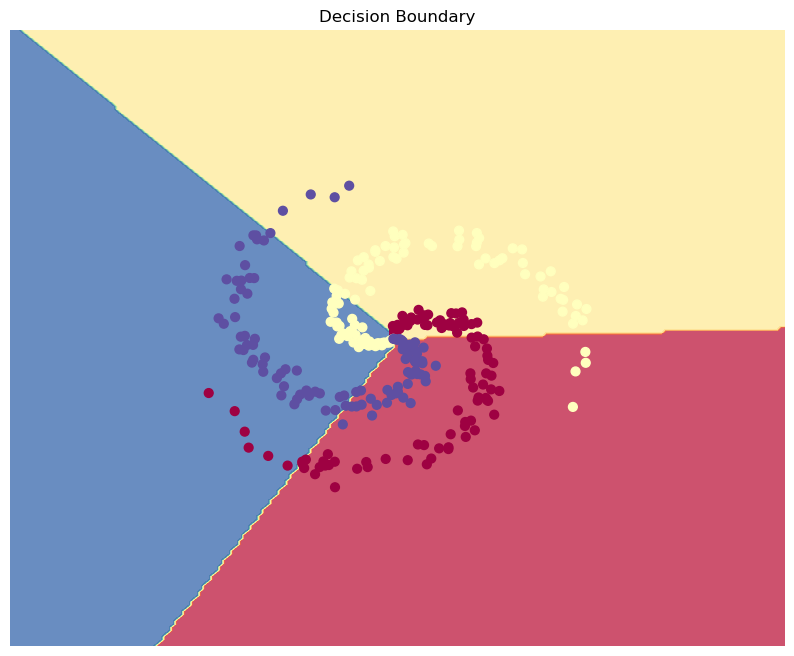

In [26]:
def plot_decision_boundary(X, y):
    h = 0.02  # step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Generate predictions for each point in the mesh
    Z = np.dot(np.c_[xx.ravel(), yy.ravel()], W) + b
    Z = np.argmax(Z, axis=1)
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
    plt.title("Decision Boundary")


plot_decision_boundary(X, y)
plt.show()

In [27]:
# initialize parameters randomly
h = 100  # size of hidden layer
W = 0.01 * np.random.randn(D, h)
b = np.zeros((1, h))
W2 = 0.01 * np.random.randn(h, K)
b2 = np.zeros((1, K))

# some hyperparameters
step_size = 1e-0
reg = 1e-3  # regularization strength
epochs = 10000

num_examples = X.shape[0]
lossi = []
for i in range(epochs):
    activation = np.dot(X, W) + b
    hidden_layer = np.maximum(0, activation)
    scores = np.dot(hidden_layer, W2) + b2

    exp_scores = np.exp(scores)
    probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)  # [N x K]

    correct_logprobs = -np.log(probs[range(num_examples), y])
    data_loss = np.sum(correct_logprobs) / num_examples
    reg_loss = 0.5 * reg * np.sum(W * W) + 0.5 * reg * np.sum(W2 * W2)
    loss = data_loss + reg_loss
    predicted_class = np.argmax(scores, axis=1)
    accuracy = np.mean(predicted_class == y)
    if i % 1000 == 0:
        print(f"iteration {i}: loss {loss} Accuracy: {round(accuracy * 100, 2)}%")

    # compute the gradient on scores
    dscores = probs
    dscores[range(num_examples), y] -= 1
    dscores /= num_examples

    # backprop
    dW2 = np.dot(hidden_layer.T, dscores)
    db2 = np.sum(dscores, axis=0, keepdims=True)
    dhidden = np.dot(dscores, W2.T)
    dhidden[hidden_layer <= 0] = 0
    dW = np.dot(X.T, dhidden)
    db = np.sum(dhidden, axis=0, keepdims=True)

    dW2 += reg * W2
    dW += reg * W

    W += -step_size * dW
    b += -step_size * db
    W2 += -step_size * dW2
    b2 += -step_size * db2

    lossi.append(loss.item())

print("-"*100)
print(f"Average Loss: {np.mean(lossi)}")

iteration 0: loss 1.0986455464027685 Accuracy: 35.67%
iteration 1000: loss 0.3246668171663072 Accuracy: 90.67%
iteration 2000: loss 0.2642445991183129 Accuracy: 98.0%
iteration 3000: loss 0.25820040615356865 Accuracy: 98.67%
iteration 4000: loss 0.25606961725385885 Accuracy: 99.0%
iteration 5000: loss 0.25508492444767694 Accuracy: 99.0%
iteration 6000: loss 0.25437430920574355 Accuracy: 99.0%
iteration 7000: loss 0.2537693505003347 Accuracy: 99.0%
iteration 8000: loss 0.25358048600269806 Accuracy: 99.0%
iteration 9000: loss 0.2534323872622687 Accuracy: 99.0%
----------------------------------------------------------------------------------------------------
Average Loss: 0.2844487044142004


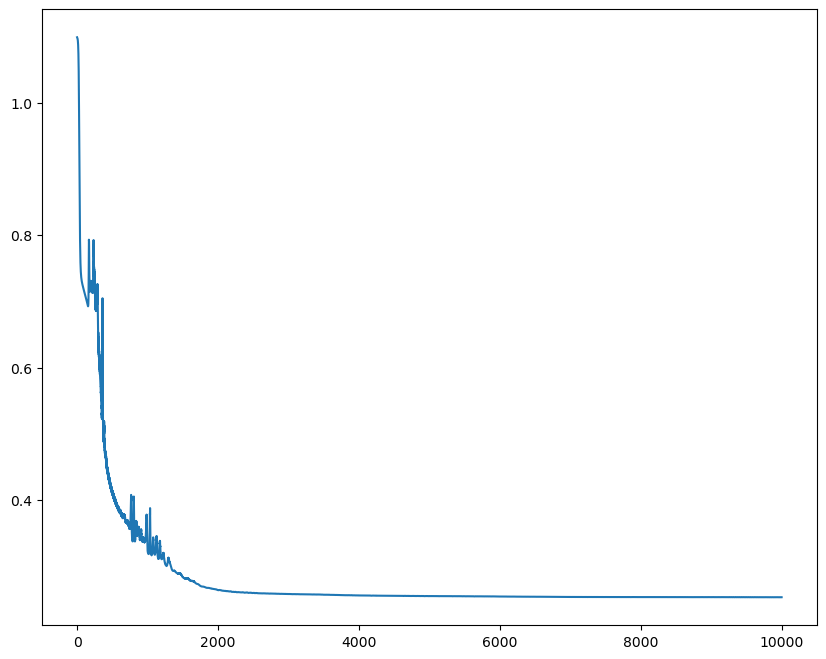

In [28]:
plt.plot(lossi)

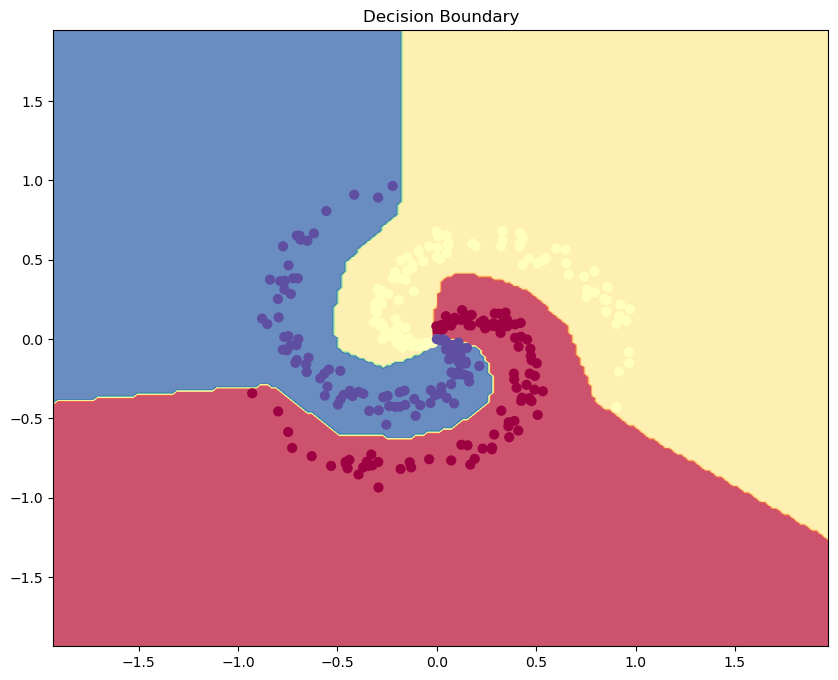

In [29]:
def plot_decision_boundary(X, y):
    h = 0.02  # step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    hidden_layer = np.maximum(
        0, np.dot(np.c_[xx.ravel(), yy.ravel()],W) +b
    )
    scores = np.dot(hidden_layer, W2) + b2
    Z = np.argmax(scores, axis=1)
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("Decision Boundary")

plot_decision_boundary(X, y)